In [38]:
%matplotlib inline

CameraViewer to barcode



In [39]:
import cv2
import numpy as np
from zro import Proxy, ZroError, Publisher
import os
from matplotlib import pyplot as plt
from subprocess import Popen, PIPE
cam = Proxy("localhost:11000")
barcode_name = 'c:/temca/temca2/images/barcode.tiff'

In [40]:
def do_opening(img):
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(5,45))
    opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
    plt.imshow(opening,'gray')
    plt.show()
    cv2.imwrite(barcode_name, 255-opening)

In [41]:
def read_barcode(fpath):
    p = Popen(['zbarimg.exe', '--raw', fpath], stdout=PIPE, stderr=PIPE, stdin=PIPE)
    barcode = p.stdout.read().strip() 
    return barcode

+++ Read the barcode

In [100]:
def read():
    im_read = cv2.imread(barcode_name)
    print read_barcode(barcode_name)

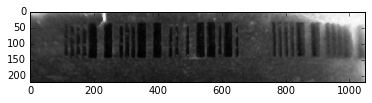

000003


In [356]:
image = cam.get_image()
image = np.rot90(image, 1)
image = image[ 180:400, 150:1200, :]

hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
#gray = hsv[:,:,2]
#gray = 255 - gray
gray = cv2.medianBlur(gray,7)
cv2.imwrite(barcode_name, gray)
plt.imshow(gray,'gray')
plt.show()

read()


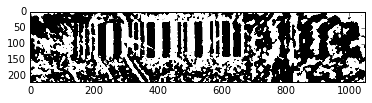

True

In [278]:
th3 = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,131,0)
plt.imshow(th3,'gray')
plt.show()
cv2.imwrite(barcode_name, th3)

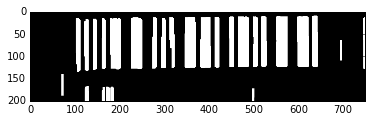

In [31]:
do_opening(255-th3)

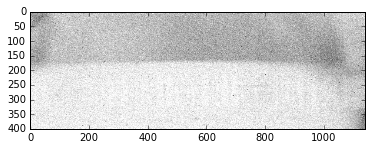

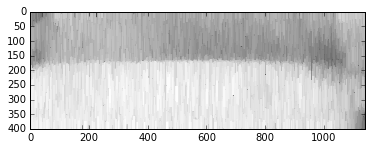

In [19]:
red = image[:,:,0]
red = 255-red
cv2.imwrite(barcode_name, red)
plt.imshow(red,'gray')
plt.show()
do_opening(red)

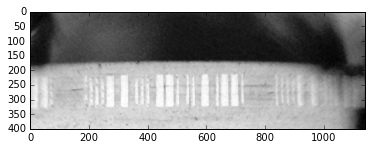

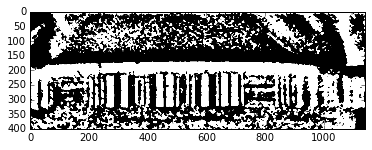

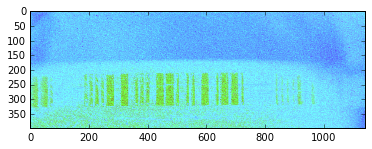

In [20]:

plt.imshow(gray,'gray')
plt.show()
plt.imshow(th3, 'gray')
plt.show()
plt.imshow(hsv[2:], 'gray')
plt.show()

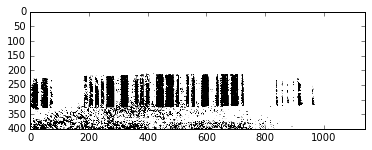

191.0

In [21]:
(thresh, im_bw) = cv2.threshold(hsv[:,:,2], 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
plt.imshow(im_bw,'gray')
plt.show()
thresh

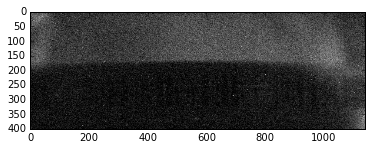

In [22]:
plt.imshow(image[:,:,0],'gray')
plt.show()